In [1]:
import pandas as pd

# Load CSV files
train = pd.read_csv('../data/train.csv')
features = pd.read_csv('../data/features.csv')
stores = pd.read_csv('../data/stores.csv')

# Check the shape and preview
print(train.shape)
print(features.shape)
print(stores.shape)

train.head()


(421570, 5)
(8190, 12)
(45, 3)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [2]:
# Merge train with features on Store, Date, and IsHoliday
merged = pd.merge(train, features, on=['Store', 'Date', 'IsHoliday'], how='left')

# Merge with store metadata
merged = pd.merge(merged, stores, on='Store', how='left')

# Convert 'Date' to datetime
merged['Date'] = pd.to_datetime(merged['Date'])

merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [3]:
# Check for missing values
print(merged.isnull().sum())

# Optionally: fill or drop missing values
merged.fillna(0, inplace=True)  # Simple way to handle NAs for now

# Check types
merged.info()


Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
 5   Temperature   421570 non-null  float64       
 6   Fuel_Price    421570 non-null  float64       
 7   MarkDown1     421570 non-null  float64      

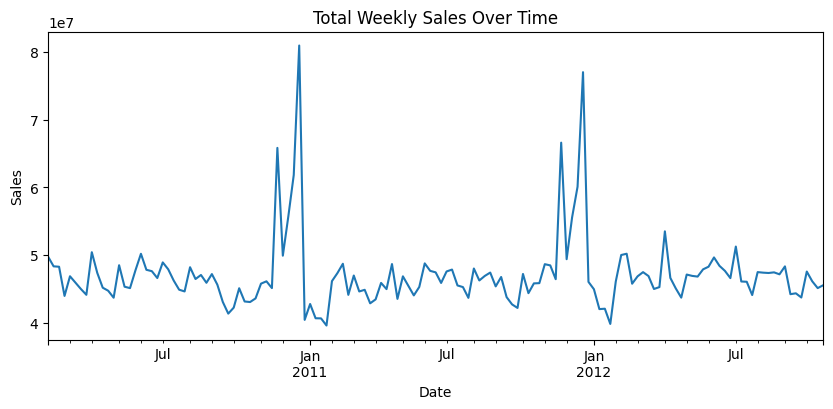

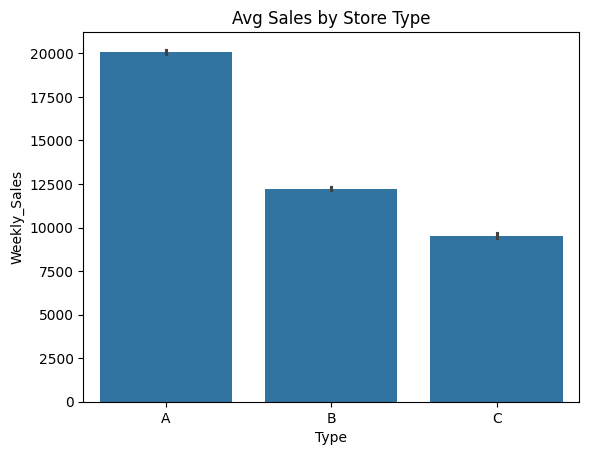

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total weekly sales over time
weekly_sales = merged.groupby('Date')['Weekly_Sales'].sum()
weekly_sales.plot(figsize=(10,4), title='Total Weekly Sales Over Time')
plt.ylabel('Sales')
plt.show()

# Average sales per store type
sns.barplot(data=merged, x='Type', y='Weekly_Sales')
plt.title('Avg Sales by Store Type')
plt.show()


In [6]:
# Merge train with stores
merged = train.merge(stores, how='left', on='Store')

# Merge with features
merged = merged.merge(features, how='left', on=['Store', 'Date'])


In [7]:
merged['Date'] = pd.to_datetime(merged['Date'])


In [8]:
merged = merged.dropna(subset=['Weekly_Sales'])  # or use fillna if needed


In [9]:
merged.to_csv('merged_cleaned_data.csv', index=False)
print("✅ merged_cleaned_data.csv saved successfully.")


✅ merged_cleaned_data.csv saved successfully.


In [10]:
df = pd.read_csv('merged_cleaned_data.csv')


In [11]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [17]:
print(df.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3',
       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'year',
       'month', 'day', 'dayofweek', 'is_weekend'],
      dtype='object')


In [18]:
df = df.rename(columns={'Weekly_Sales': 'sales'})


In [19]:
df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# ✅ Rename column to match feature engineering steps
df = df.rename(columns={'Weekly_Sales': 'sales'})

# ✅ Sort
df = df.sort_values(by=['Store', 'Date'])

# ✅ Apply lag
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)


In [20]:
# Create lag and rolling features
df['lag_1'] = df.groupby('Store')['sales'].shift(1)
df['lag_7'] = df.groupby('Store')['sales'].shift(7)

df['rolling_avg_7'] = df.groupby('Store')['sales'].transform(lambda x: x.shift(1).rolling(window=7).mean())


In [21]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df['dayofweek'] = df['Date'].dt.dayofweek
df['is_weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)


In [22]:
# If not already done
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


In [23]:
# Drop rows with any missing values (lag/rolling will cause some)
df.dropna(inplace=True)

# Drop columns that aren’t useful for modeling
df.drop(['Date', 'IsHoliday'], axis=1, inplace=True, errors='ignore')


In [24]:
df.to_csv('train_ready.csv', index=False)
print("✅ Saved train_ready.csv — feature engineered and ready for modeling.")


✅ Saved train_ready.csv — feature engineered and ready for modeling.


In [25]:
import pandas as pd

df = pd.read_csv('merged_cleaned_data.csv')
df['Date'] = pd.to_datetime(df['Date'])  # Important!

In [26]:
model_data = pd.read_csv('train_ready.csv')


In [32]:
import pandas as pd

model_data = pd.read_csv('train_ready.csv')
print(model_data.head())


   Store  Dept     sales  IsHoliday_x    Size  Temperature  Fuel_Price  \
0      1     1  18689.54        False  151315        59.11       3.297   
1      1     2  44936.47        False  151315        59.11       3.297   
2      1     3   9959.64        False  151315        59.11       3.297   
3      1     4  36826.52        False  151315        59.11       3.297   
4      1     5  31002.65        False  151315        59.11       3.297   

   MarkDown1  MarkDown2  MarkDown3  ...     lag_1      lag_7  rolling_avg_7  \
0    10382.9    6115.67     215.07  ...  13026.08  152401.64   69638.215714   
1    10382.9    6115.67     215.07  ...  18689.54   77943.57   50536.487143   
2    10382.9    6115.67     215.07  ...  44936.47   59511.97   45821.187143   
3    10382.9    6115.67     215.07  ...   9959.64  114793.92   38742.282857   
4    10382.9    6115.67     215.07  ...  36826.52   33307.40   27604.082857   

   year  month  day  dayofweek  is_weekend  Type_B  Type_C  
0  2011     11   11

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [35]:
print(model_data.columns.tolist())


['Store', 'Dept', 'sales', 'IsHoliday_x', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'IsHoliday_y', 'lag_1', 'lag_7', 'rolling_avg_7', 'year', 'month', 'day', 'dayofweek', 'is_weekend', 'Type_B', 'Type_C']


In [39]:
from sklearn.model_selection import train_test_split

X = model_data.drop(['sales'], axis=1)
y = model_data['sales']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False  # For time series
)


In [40]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_pred = model.predict(X_test)


In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ MAE: {mae:.2f}")


✅ RMSE: 8210.56
✅ MAE: 4369.79


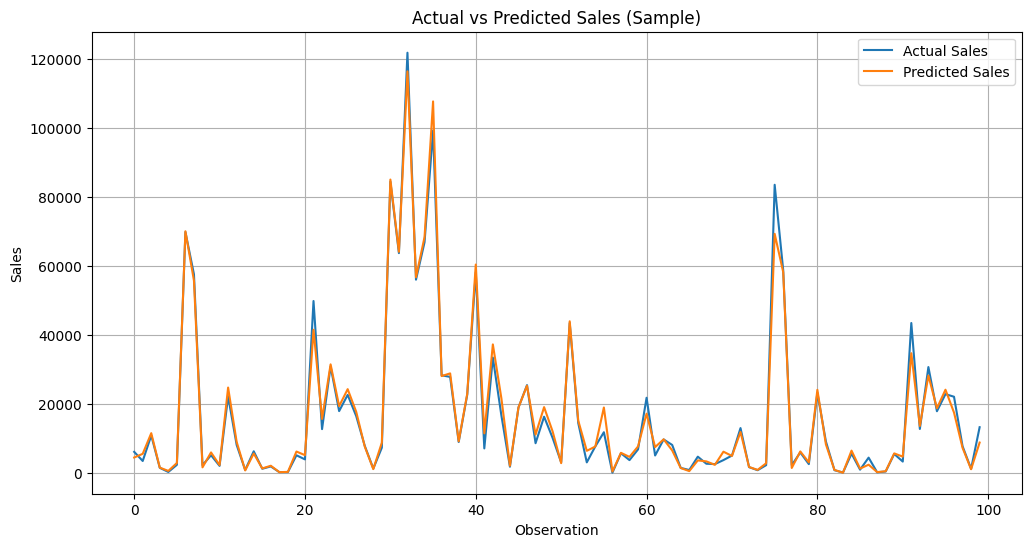

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.values[:100], label='Actual Sales')  # First 100 points
plt.plot(y_pred[:100], label='Predicted Sales')     # First 100 predictions
plt.legend()
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Observation')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


In [44]:
import joblib

joblib.dump(model, 'sales_forecast_model.pkl')
print("✅ Model saved as 'sales_forecast_model.pkl'")


✅ Model saved as 'sales_forecast_model.pkl'


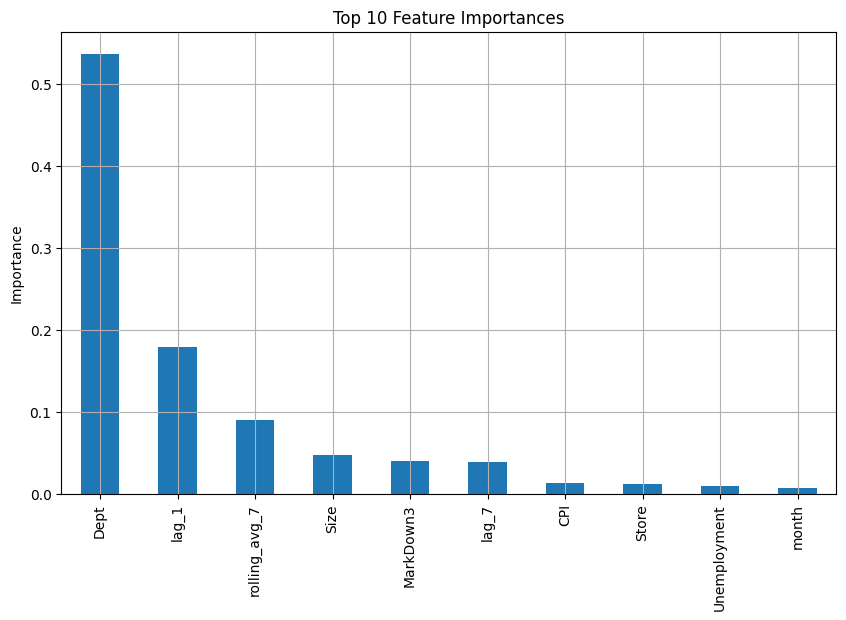

In [45]:
importances = model.feature_importances_
feature_names = X.columns

# Plot feature importances
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp[:10].plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.ylabel('Importance')
plt.grid(True)
plt.show()


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pickle
import os

# Step 1: Load the data
model_data = pd.read_csv('train_ready.csv')

# Step 2: Prepare features and target
X = model_data.drop(['sales'], axis=1)
y = model_data['sales']

# Step 3: Time-based split (no shuffling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Step 4: Train model again
model = RandomForestRegressor()
model.fit(X_train, y_train)

# ✅ Ensure 'notebook' directory exists
os.makedirs("notebook", exist_ok=True)

# Step 5: Save model
with open("notebook/sales_forecast_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [13]:
import pickle
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load model
with open("notebook/sales_forecast_model.pkl", "rb") as f:
    model = pickle.load(f)

# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")



MAE: 4313.10
RMSE: 7984.45
R² Score: 0.86


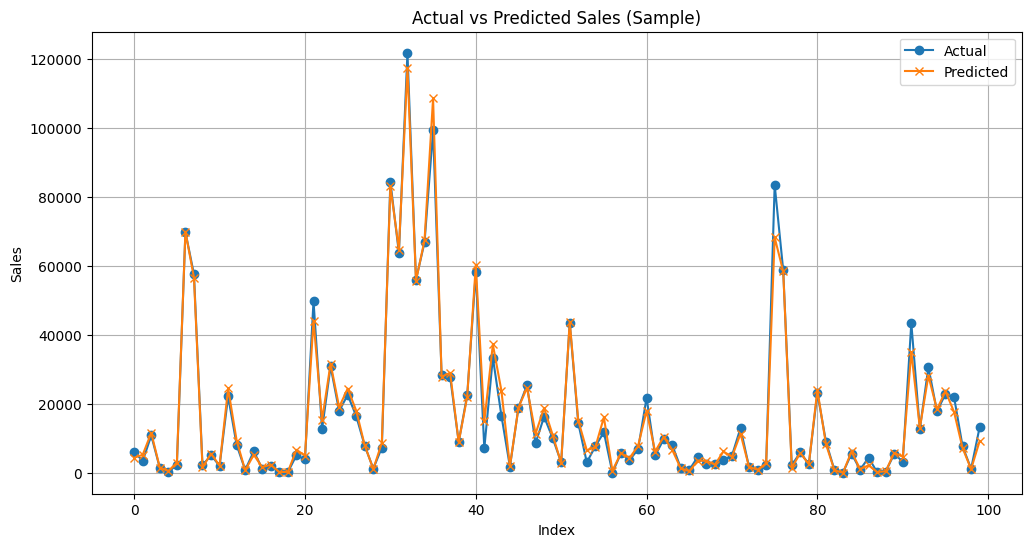

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Sales (Sample)')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
forecast_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
forecast_df.to_csv("notebook/forecast_output.csv", index=False)


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the forecast output
forecast_df = pd.read_csv("notebook/forecast_output.csv")
forecast_df.head()


,Actual,Predicted
0,6075.39,4363.8446
1,3418.61,5225.1945
2,10829.44,11593.7820
3,1430.50,1510.3340
4,233.44,513.9031


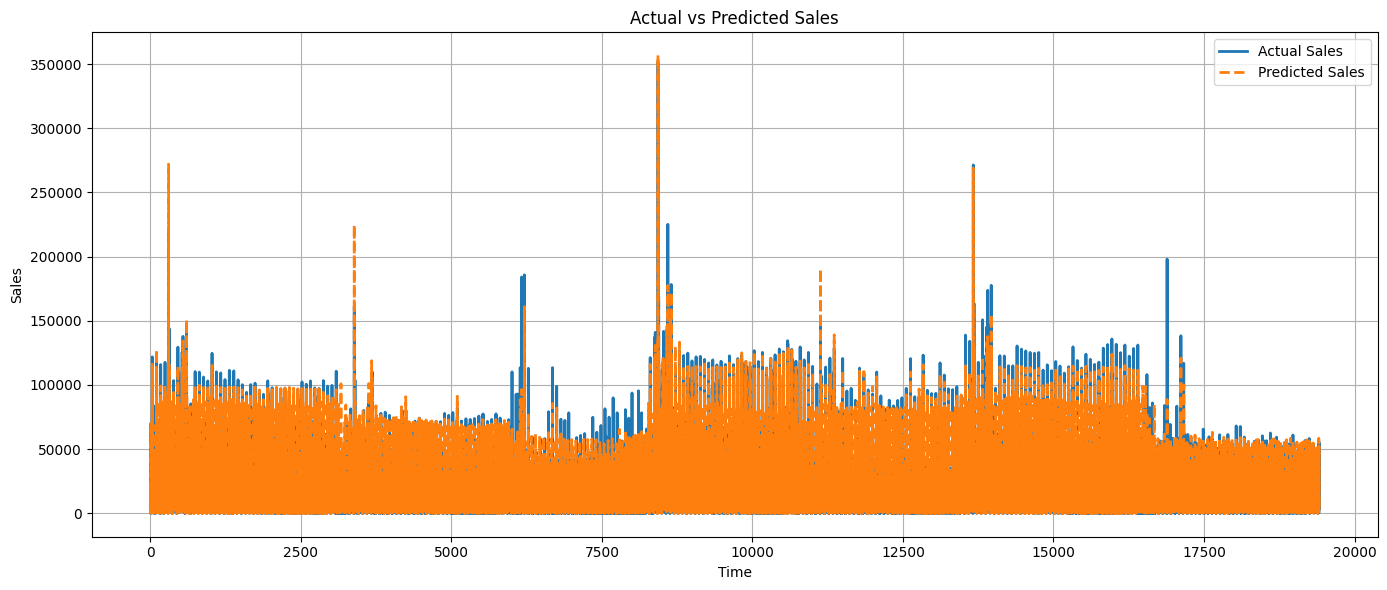

In [21]:
plt.figure(figsize=(14, 6))
plt.plot(forecast_df['Actual'].values, label='Actual Sales', linewidth=2)
plt.plot(forecast_df['Predicted'].values, label='Predicted Sales', linestyle='--', linewidth=2)
plt.title('Actual vs Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


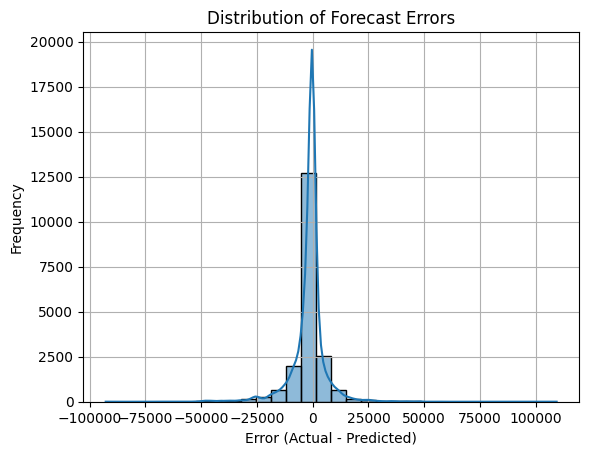

In [22]:
forecast_df['Error'] = forecast_df['Actual'] - forecast_df['Predicted']

sns.histplot(forecast_df['Error'], bins=30, kde=True)
plt.title('Distribution of Forecast Errors')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


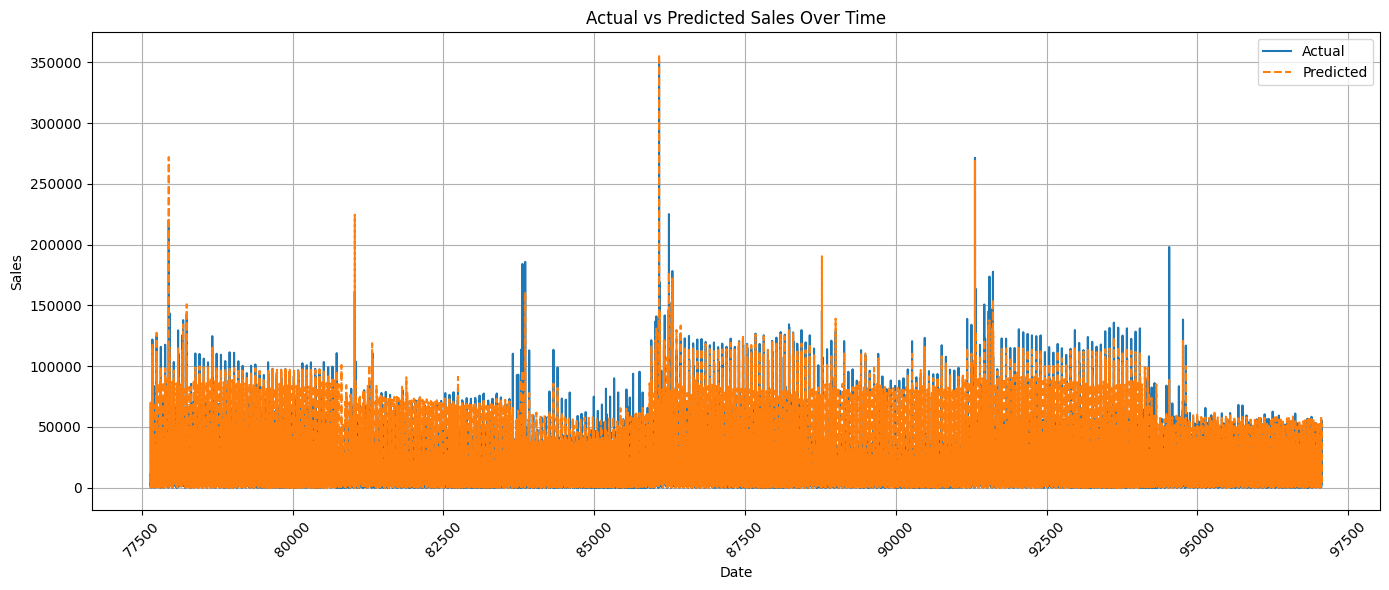

In [23]:
# Assuming 'Date' was in your test set
forecast_df['Date'] = y_test.index  # if Date was index
# or forecast_df['Date'] = test_df['Date'].values

plt.figure(figsize=(14, 6))
plt.plot(forecast_df['Date'], forecast_df['Actual'], label='Actual')
plt.plot(forecast_df['Date'], forecast_df['Predicted'], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()
